In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:/Users/Faith/Downloads/Copper_Set.xlsx - Result 1.csv")

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


# Removal of rubbish values that are present in ‘Material_Reference’

In [6]:
for i in range(len(df['material_ref'])):
    if str(df.at[i,'material_ref']).startswith("00000"):
        df.at[i,'material_ref']='NaN'

In [7]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [9]:
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')

In [10]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')

In [11]:
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181670 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

# Checking for null values

In [13]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

#  If the number of missing values is very large then it can be replaced with a new category

In [14]:
df['material_ref'].fillna('Unknown', inplace=True)

# Getting the country number for which the id's are null and their indexes.

In [15]:
#country number
l=list(df.iloc[df.loc[df['id'].isna()].index,4])
#indexes
ind=list(df.loc[df['id'].isna()].index)
print(l)
print(ind)

[28.0, 27.0]
[26, 104566]


# Imputation for id's by assigning the mode of id of that particular country which has null value.

In [16]:
for i,j in zip(l,ind):
    ids=df.loc[df.loc[df['country']==i].index,'id']
    impute_value=ids.mode()[0]
    df.at[j,'id']=impute_value
    

# Getting the country number for which the item_date's are null and their indexes.

In [17]:
l=list(df.iloc[df.loc[df['item_date'].isna()].index,4])
#indexes
ind=list(df.loc[df['item_date'].isna()].index)
print(l)
print(ind)

[77.0, 80.0, 26.0]
[52, 104640, 105485]


# Imputation for item_date by assigning the mode of item_date of that particular country which has null value.

In [18]:
for i,j in zip(l,ind):
    dates=df.loc[df.loc[df['country']==i].index,'item_date']
    impute_value=dates.mode()[0]
    df.at[j,'item_date']=impute_value

# Imputation of quantity tons by taking its mean.

In [19]:
#index
ind=df.loc[df['quantity tons'].isna()].index
#finding the mean value
impute_value=df['quantity tons'].mean()
df.at[ind[0],'quantity tons']=impute_value

# Getting the country number for which the customer is null and its index

In [20]:
coun = list(df.iloc[df.loc[df['customer'].isna()].index,4])
ind = df.loc[df['customer'].isna()].index

In [25]:
ind[0]

104684

# Imputation for customer by assigning the mode of customer of that particular country which has null value.

In [22]:
cust = df.loc[df.loc[df['country']==coun[0]].index,'customer']
impute_value=cust.mode()[0]
df.at[ind[0],'customer']=impute_value

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Separating continuos variables into seperate dataframe for finding skewness

In [35]:
df1=pd.DataFrame()

In [36]:
df1['quantity tons']=df['quantity tons']
df1['thickness']=df['thickness']
df1['width']=df['width']
df1['selling_price']=df['selling_price']

In [37]:
df1.head()

,quantity tons,thickness,width,selling_price
0,54.151139,2.00,1500.0,854.00
1,768.024839,0.80,1210.0,1047.00
2,386.127949,0.38,952.0,644.33
3,202.411065,2.30,1317.0,768.00
4,785.526262,4.00,2000.0,577.00


In [39]:
df1.skew()

quantity tons    424.649905
thickness        303.476674
width              0.374850
selling_price    301.359055
dtype: float64

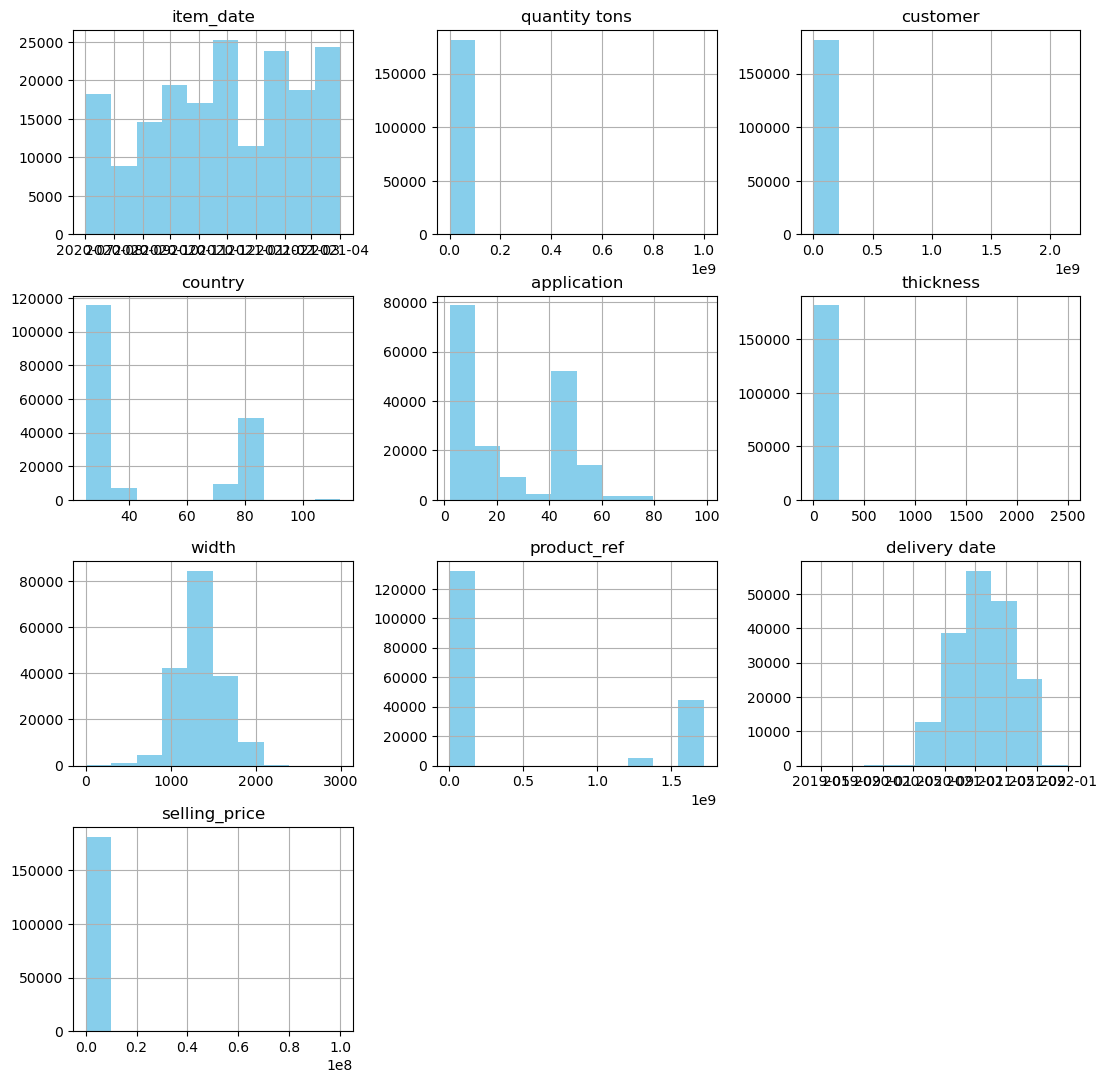

In [38]:
df.hist(figsize = (13,13), color = 'skyblue')
plt.show()

<AxesSubplot:xlabel='quantity tons', ylabel='Density'>

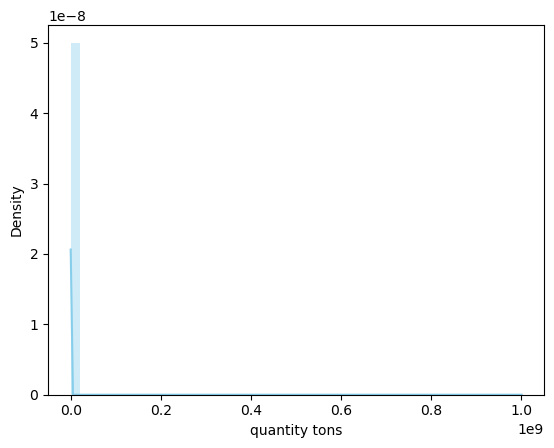

In [22]:
sns.distplot(df['quantity tons'] , color="skyblue")

<AxesSubplot:xlabel='thickness', ylabel='Density'>

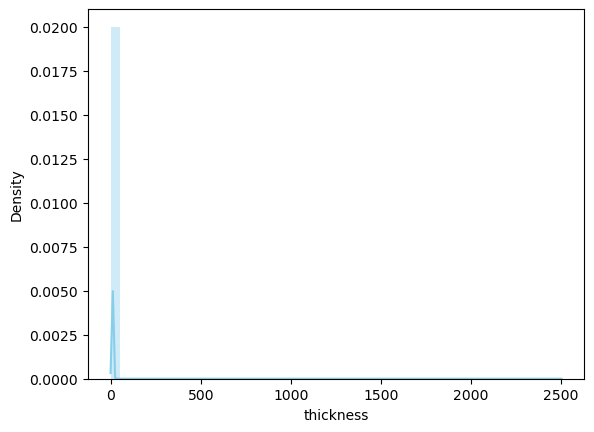

In [40]:
sns.distplot(df['thickness'] , color="skyblue")

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

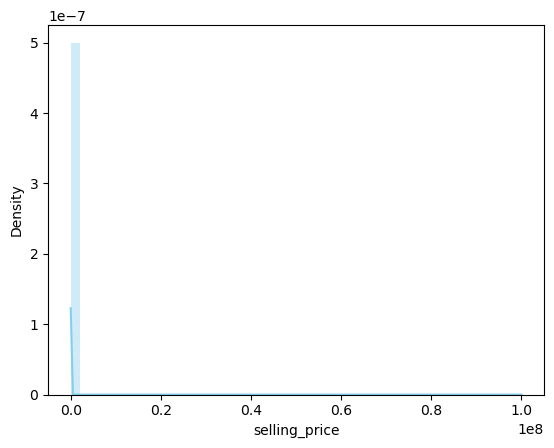

In [41]:
sns.distplot(df['selling_price'] , color="skyblue")